# Le couloir

### Partie 1 : Importations

On importe les algorithmes ainsi que les librairies utiles

In [2]:
# LES ALGORITHMES
from QLearning import *
from DQN import *

# POUR AFFICHAGE
import matplotlib.pyplot as plt
import seaborn as sns

# POUR ENVIRONNEMENT
import gym
from gym import spaces

### Partie 2 : Environnement LineWorld


Nous avons un couloir de taille n représenté par un array.
L'agent commence tout à gauche, et doit traverser le couloir pour arriver à droite.

Il peut soit se déplacer à gauche soit se déplacer à droite.
La solution optimale est de se déplacer vers la droite à chaque action.

In [3]:
class LineWorldEnv(gym.Env):
    def __init__(self, n_states=3):
        super(LineWorldEnv, self).__init__()
        self.n_states = n_states
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Discrete(n_states)
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0 and self.state > 0:
            self.state -= 1
        elif action == 1 and self.state < self.n_states - 1:
            self.state += 1
        done = self.state == self.n_states - 1
        reward = 10 if done else -1
        return self.state, reward, done, {}

    def render(self, mode="human"):
        print("État actuel :", self.state)
    
    def seed(self, seedInt) :
        # environnement deterministe, methode necessaire pour stablebaseline
        pass

## Observations

### 1. Optimisation de QLearning

On s'intéresse à quelques paramètres du QLearning : epsilon, learningRate (alpha) et gamma
- epsilon représente la probabilité d'exploiter
- Au plus le learningRate est élevé, au plus les observations ont du poids par rapport à ce que l'agent sait déjà
- Au plus le gamma est élevé, au plus ce qui arrive dans le long terme est considéré important

(On peut avoir quelques intuitions sur les effets de ces paramètres, un gamma très faible peut pousser à des actions court-termiste par exemple)

Vous trouverez ci-dessous des observations sur les performances du QLearning pour les paramètres suivants :
- gamma dans {0.9, 0.98, 1.02, 1.1}
- epsilon dans {0.1, 0.2, 0.3, 0.5, 0.7}
- learningRate dans {0.05, 0.1, 0.15, 0.2}

Pour des couloirs de taille : {5, 10, 15, 20}

Comme nous connaissons, le comportement optimal, nous pouvons en déduire la récompense maximale obtensible.
Dans les affichages suivants, la récompense maximale est matérialisée par l'axe des abscisses, atteindre cet axe c'est se comporter de façon optimale.

In [6]:
"""FONCTIONS D'AIDE"""

def construct_all_possibilities(gamma_possibilities, eps_possibilities, lr_possibilities) :
    n = len(eps_possibilities)
    m = len(lr_possibilities)
    k = len(gamma_possibilities)

    data = []
    for z in range(k) :
        for y in range(n) :
            for x in range(m) :
                data.append((gamma_possibilities[z], eps_possibilities[y], lr_possibilities[x], x, y, z))
    return data


def plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps, plotsize) :
    data = construct_all_possibilities(gamma_possibilities, eps_possibilities, lr_possibilities)
    n = len(eps_possibilities)
    m = len(lr_possibilities)
    k = len(gamma_possibilities)

    fig, axes = plt.subplots(m * k, n, figsize=(80, 80))
    
    for gamma, epsilon, alpha, x, y, z in data :
        env = LineWorldEnv(size)
    
        QTable, QRewards = train_q_learning(env, timesteps = timesteps, epsilon = epsilon, alpha = alpha, gamma = gamma)
    
        axes[x+z*m, y].plot([r - (12 - size) for r in QRewards])
        axes[x+z*m, y].set_xlabel("Épisode")
        axes[x+z*m, y].set_ylabel("Récompense")
        axes[x+z*m, y].set_title(f"Récompense par épisode pour alpha = {alpha}, epsilon = {epsilon}, gamma = {gamma}")
        axes[x+z*m, y].grid()
        axes[x+z*m, y].set_xlim([0, plotsize])
        axes[x+z*m, y].set_ylim([-60, 5])
    plt.savefig(f"QLearning_Corridor{size}.png", bbox_inches='tight')
    plt.show()

### 1.1 Optimisation epsilon et learningRate et gamma pour couloir de taille 5

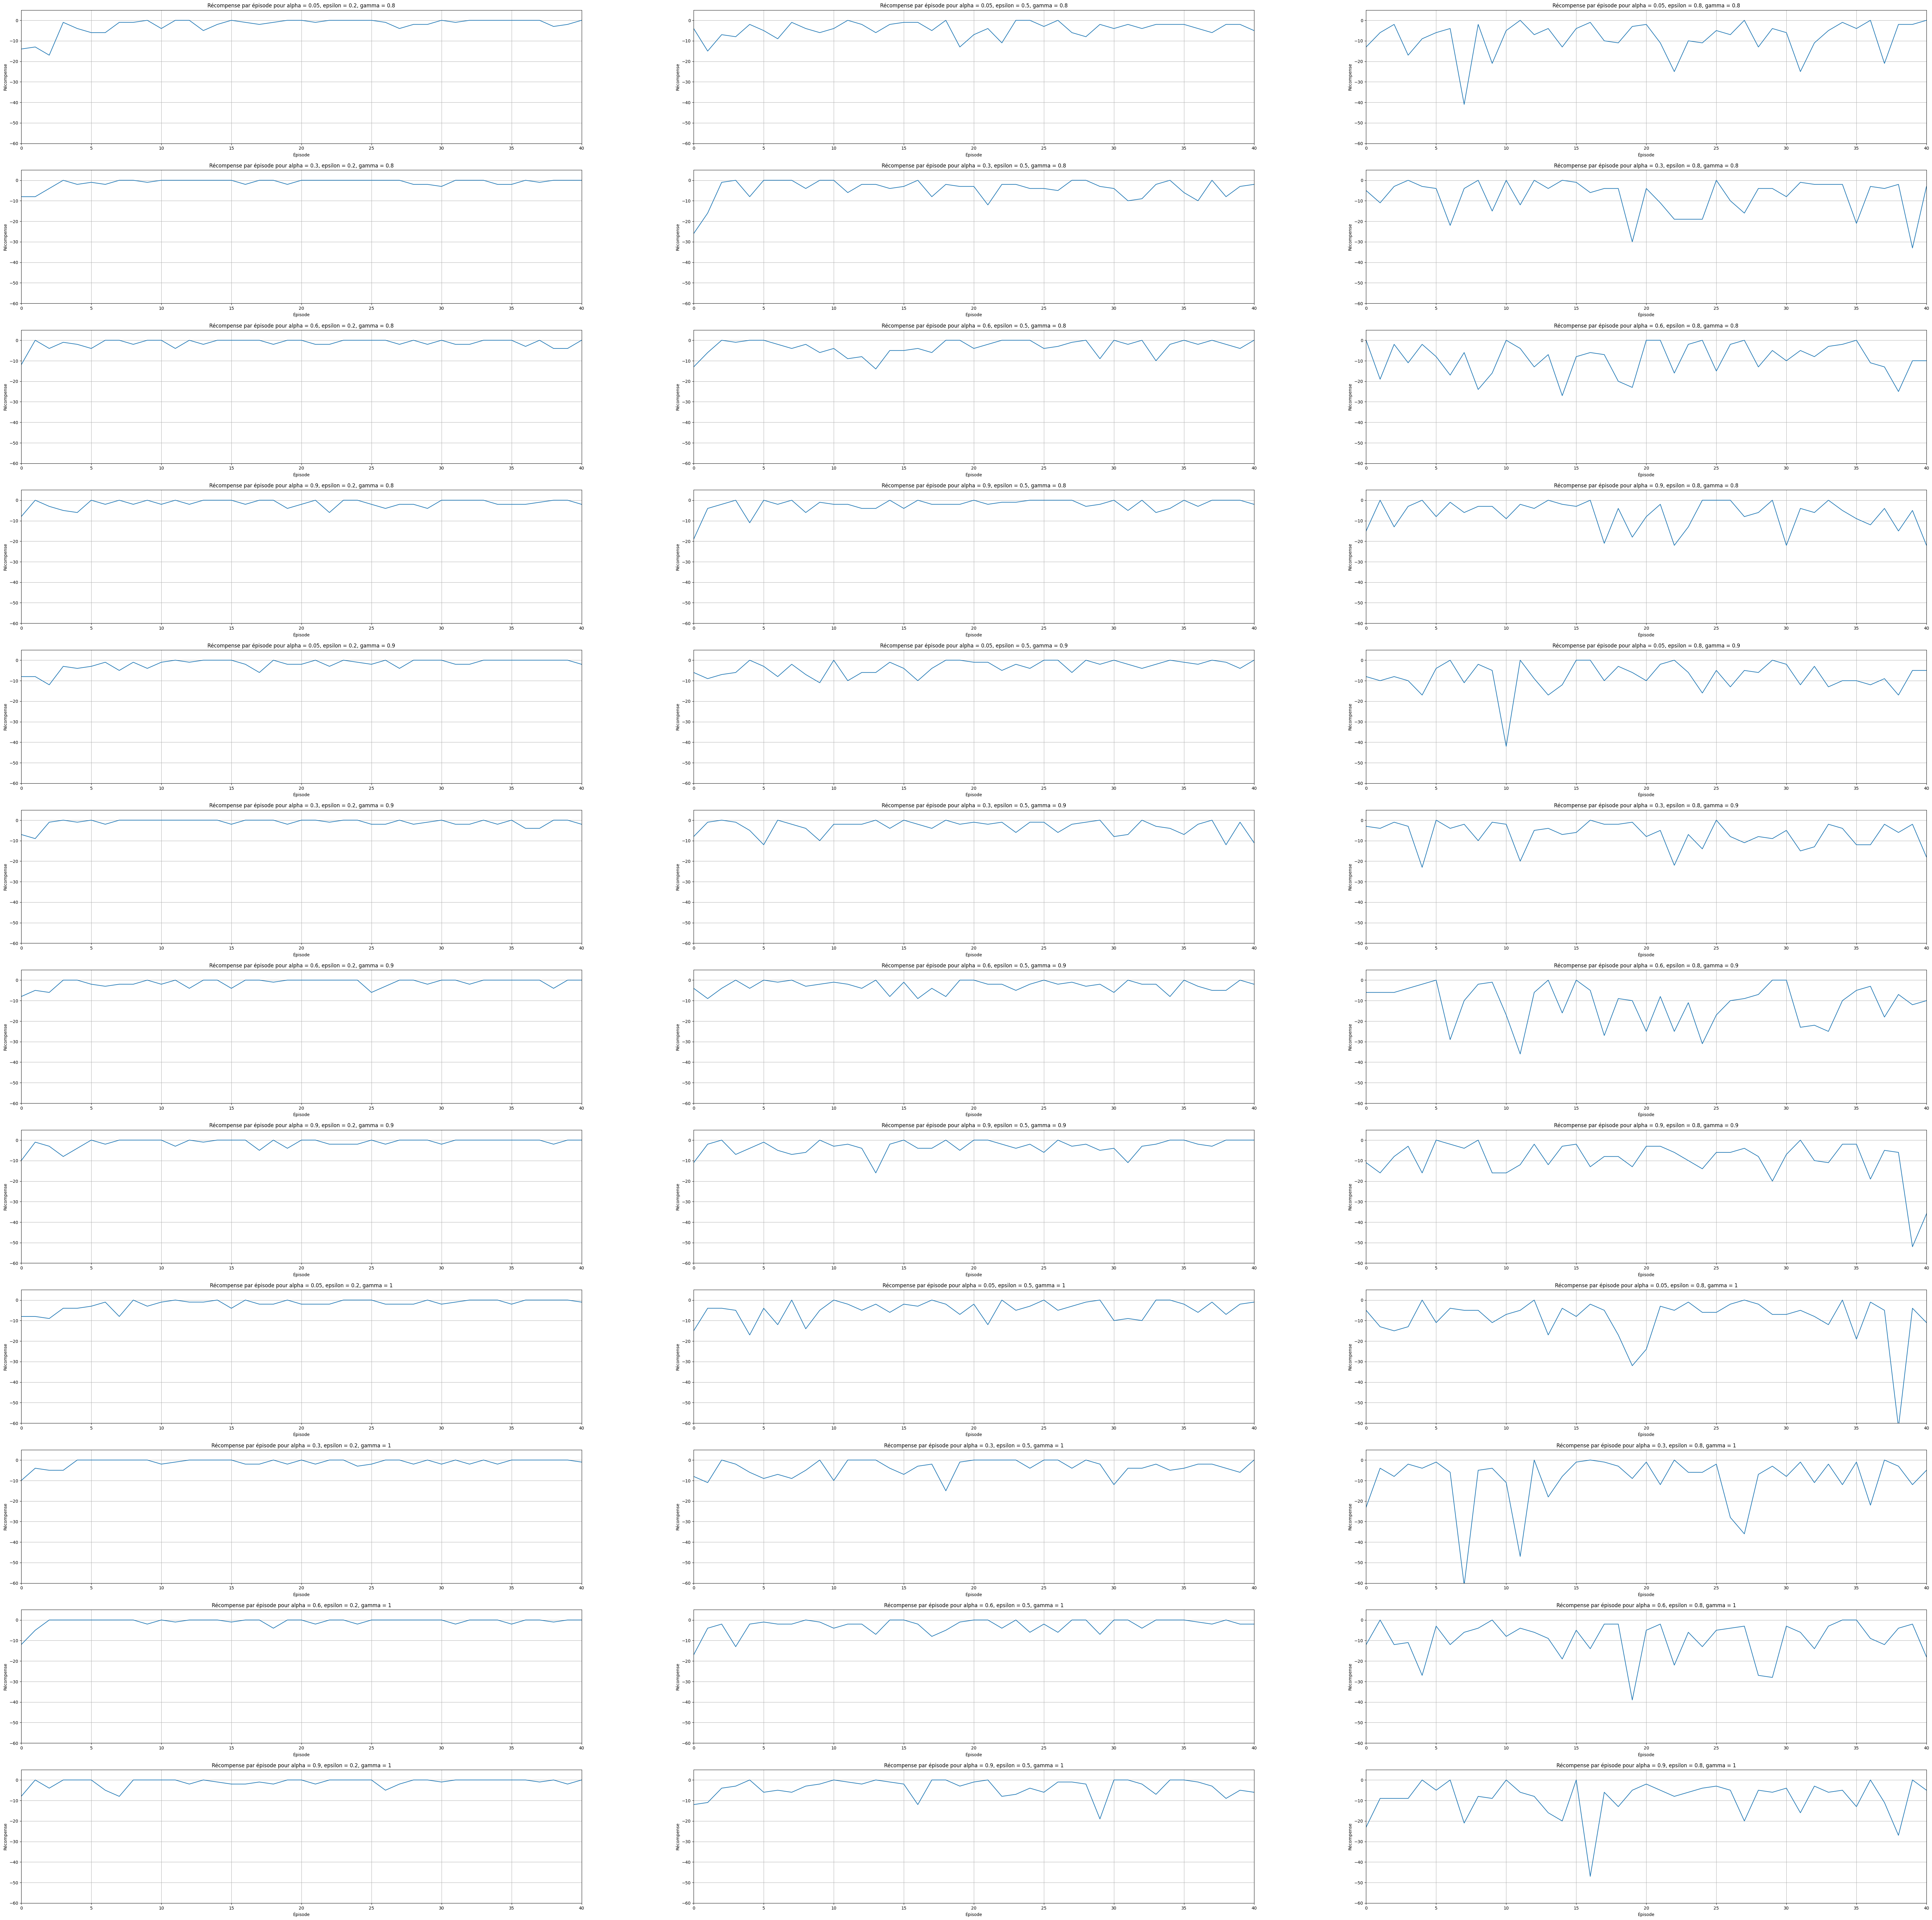

In [7]:

size = 5
timesteps = 1000

# Construct all possibilities
gamma_possibilities = [0.8, 0.9, 1]
eps_possibilities = [0.2, 0.5, 0.8]
lr_possibilities = [0.05, 0.3, 0.6, 0.9]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps, plotsize = 40)

Plus alpha est élevé, meilleurs sont les résultats.

### 1.2 Optimisation epsilon et learningRate et gamma pour couloir de taille 10

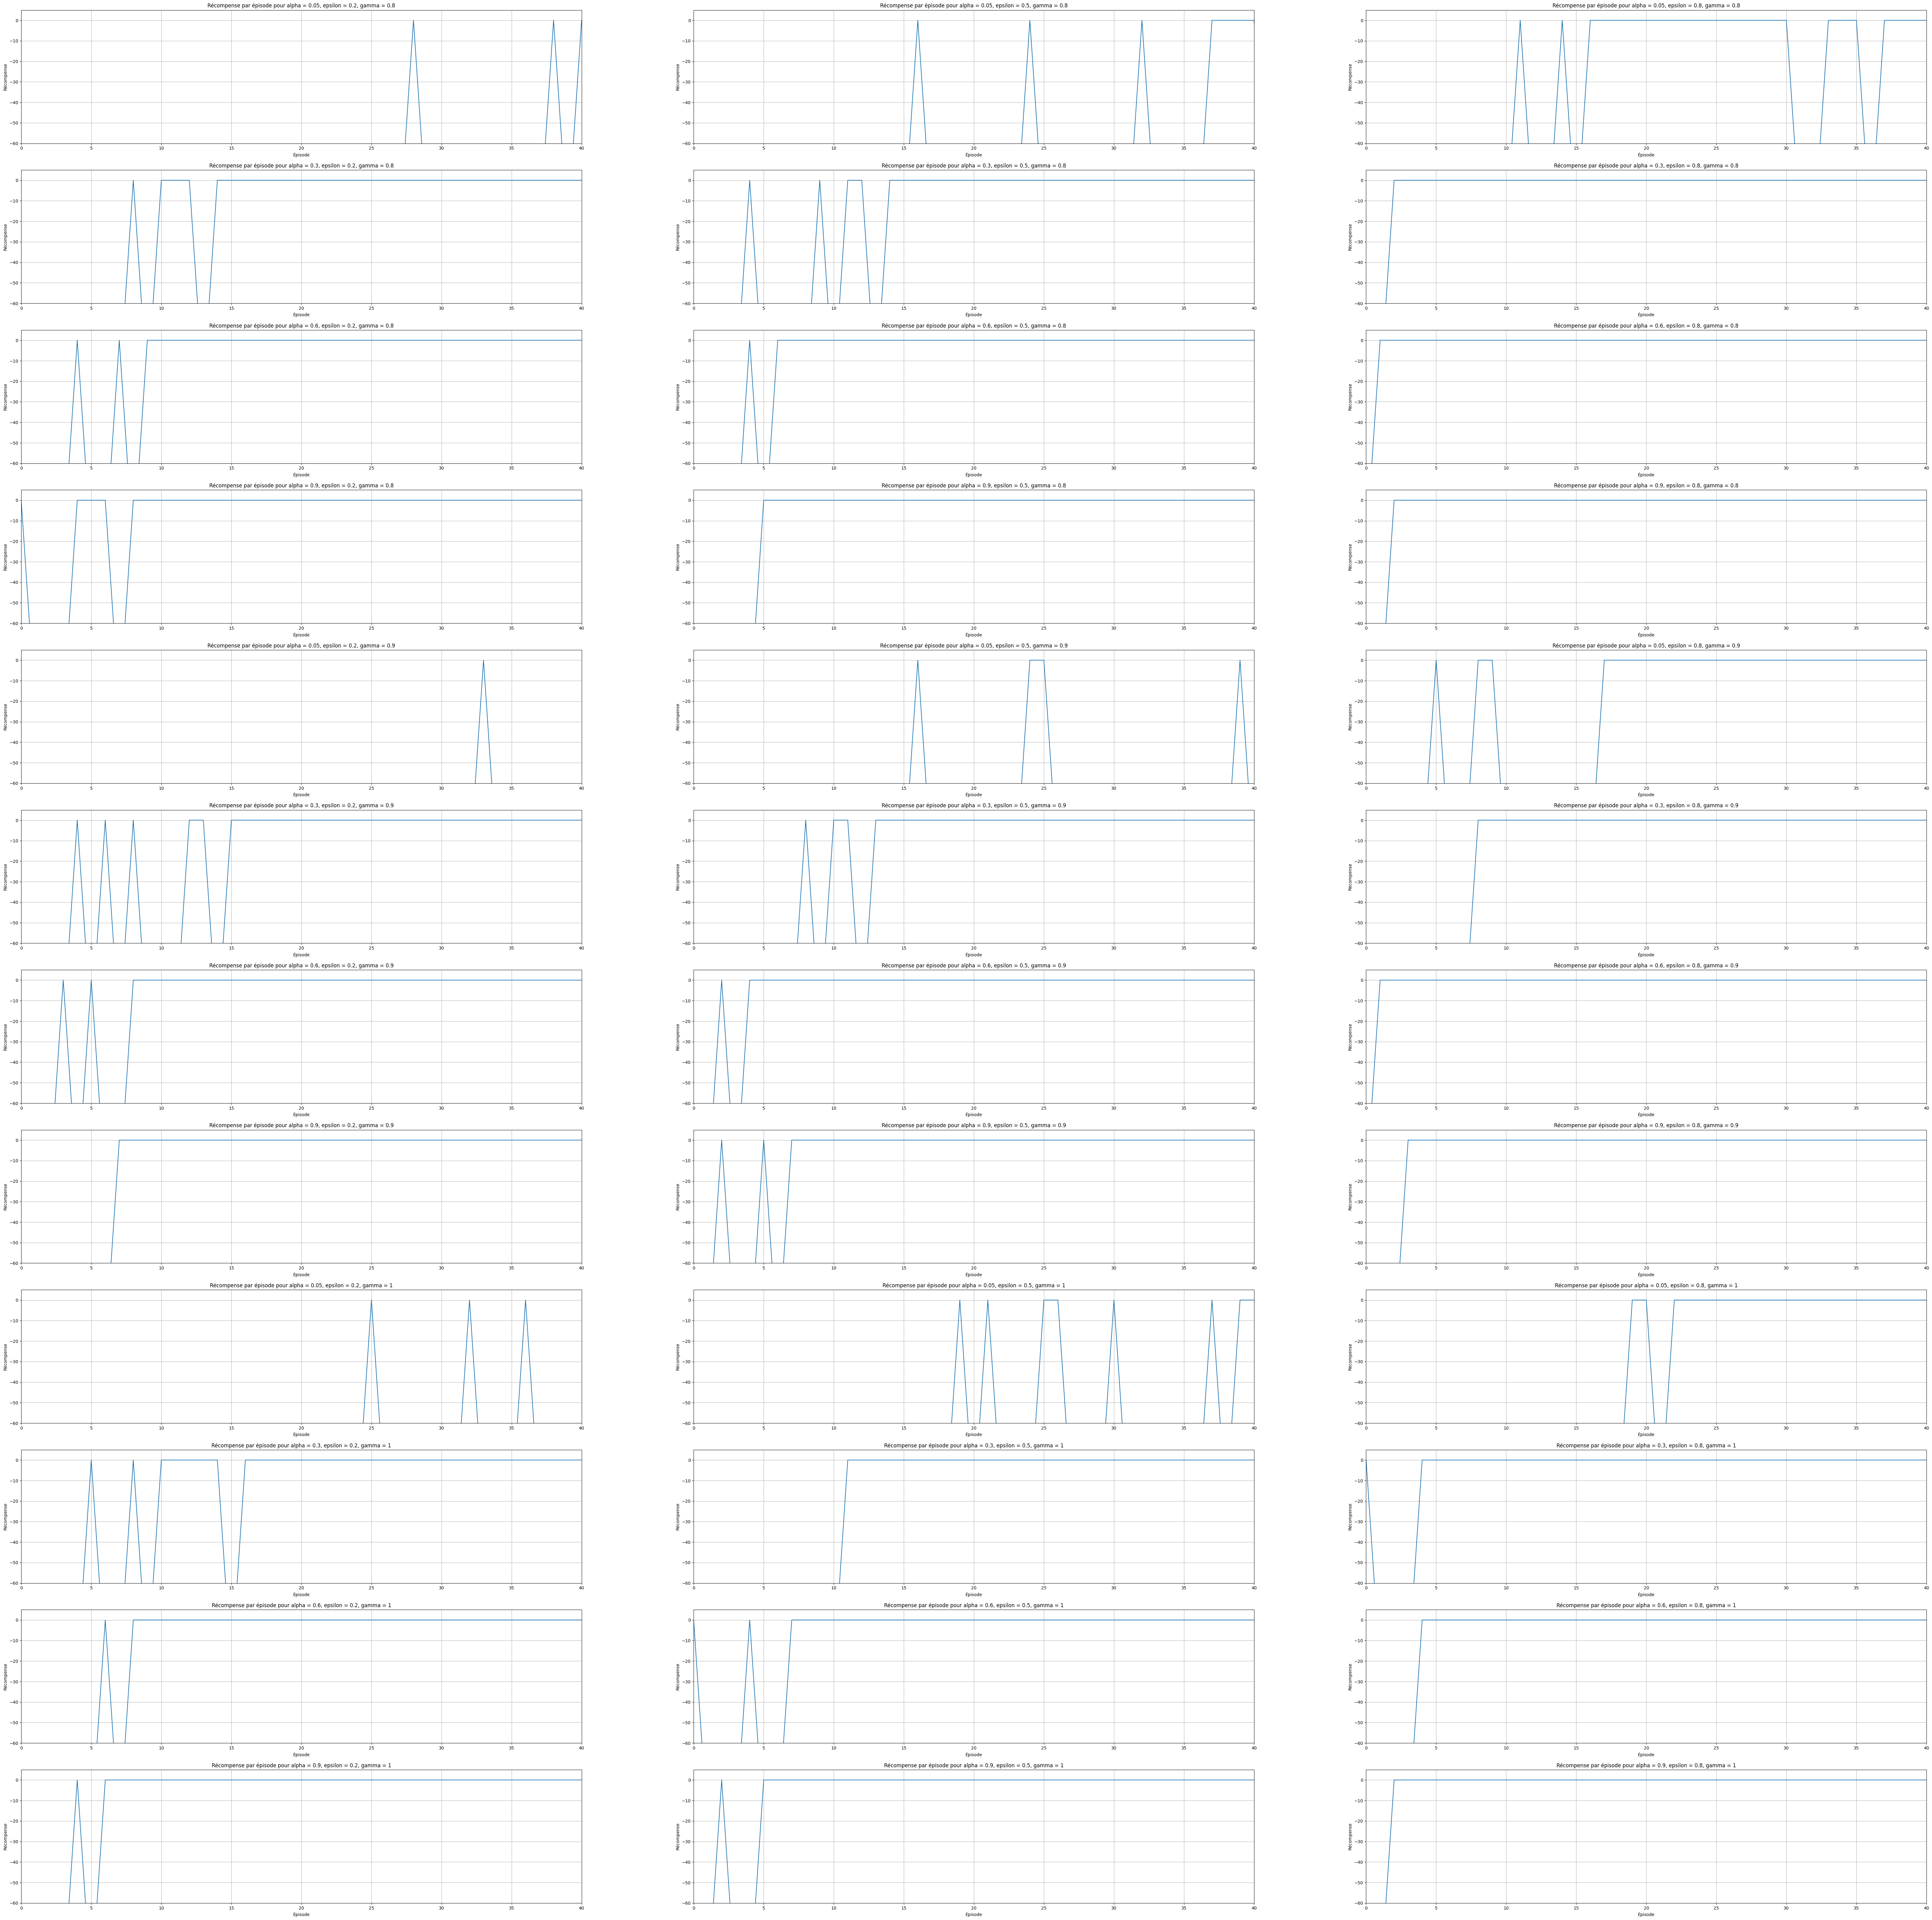

In [7]:

size = 10
timesteps = 2000

# Construct all possibilities
gamma_possibilities = [0.8, 0.9, 1]
eps_possibilities = [0.2, 0.5, 0.8]
lr_possibilities = [0.05, 0.3, 0.6, 0.9]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps, plotsize = 40)

En plus d'une grande valeur de alpha, il semblerait qu'une grande valeur pour epsilon peut aider.
Il semblerait qu'il est préférable de conservé un gamma proche de 0.9

Pour les prochaines visualisations, on prend alpha dans {0.8, 0.85, 0.9, 0.95} et epsilon dans {0.3, 0.5, 0.7, 0.9}

### 1.3 Optimisation epsilon et learningRate et gamma pour couloir de taille 15

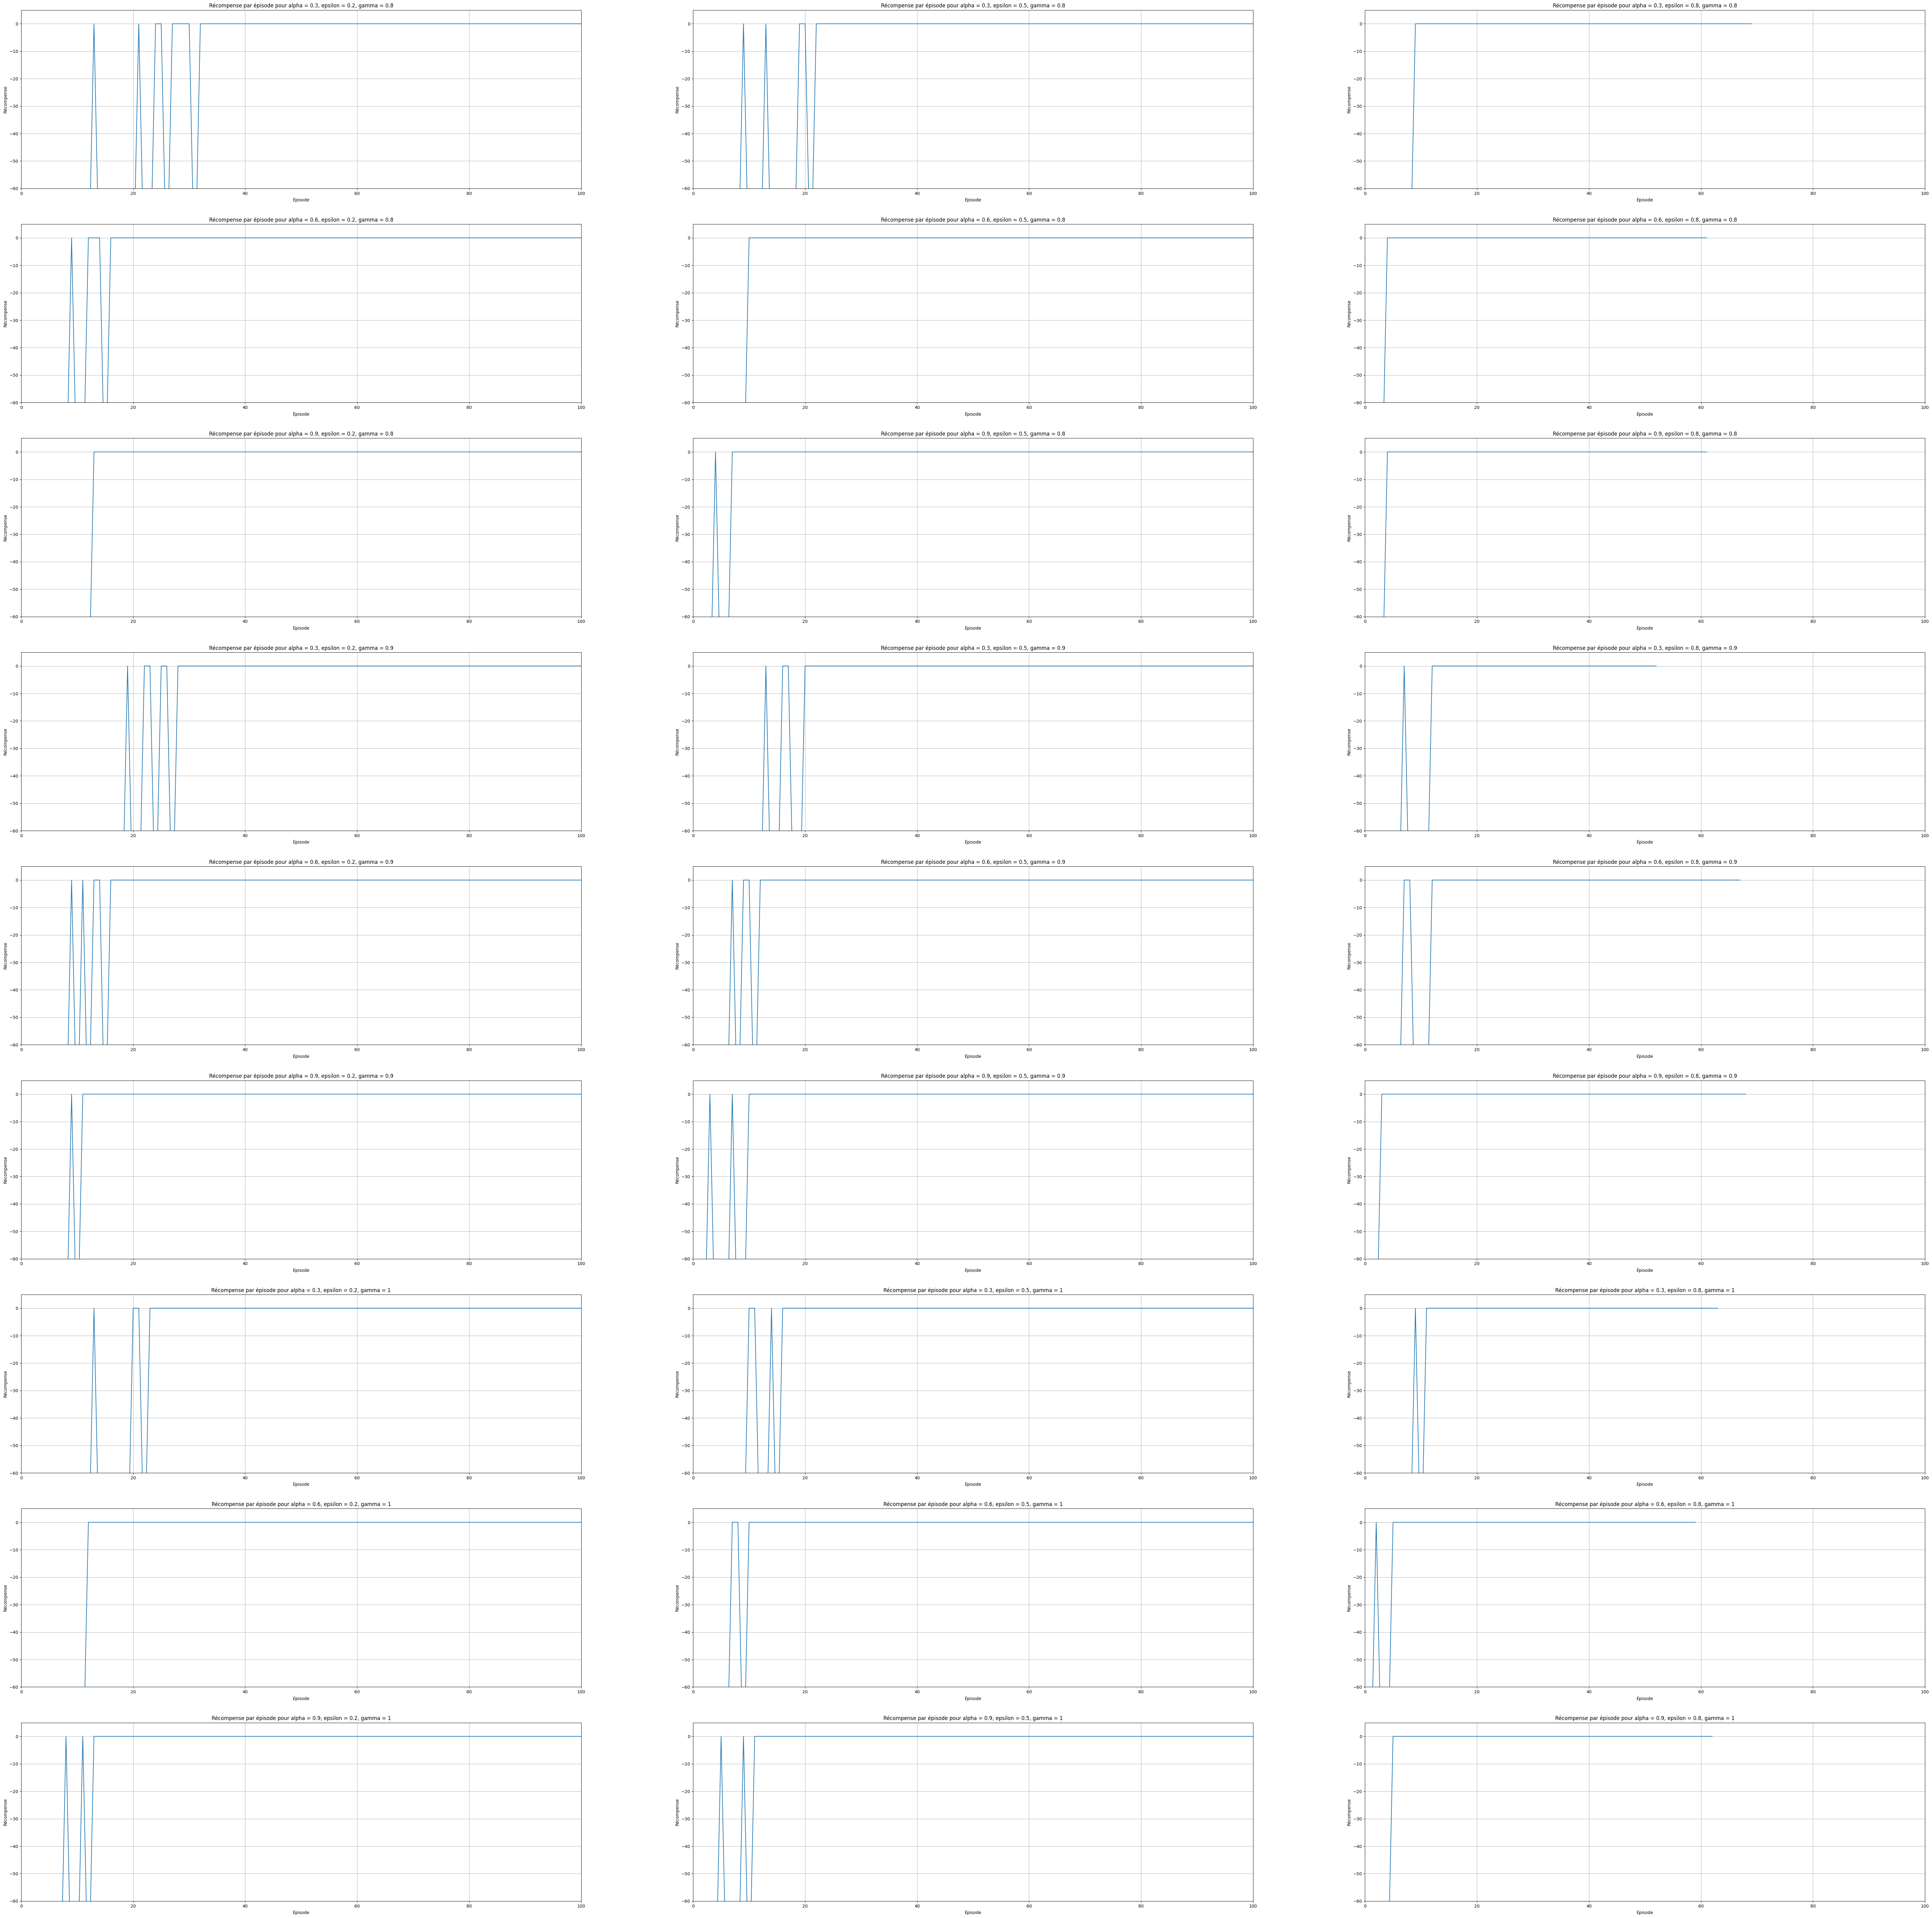

In [13]:

size = 15
timesteps = 4000

# Construct all possibilities
gamma_possibilities = [0.8, 0.9, 1]
eps_possibilities = [0.2, 0.5, 0.8]
lr_possibilities = [0.3, 0.6, 0.9]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps, plotsize = 100)

Il est clair que l'alpha doit se trouver aux alentours de 0.6
Il est aussi préférable que epsilon soit assez élevé


### 1.4 Optimisation epsilon et learningRate et gamma pour couloir de taille 20

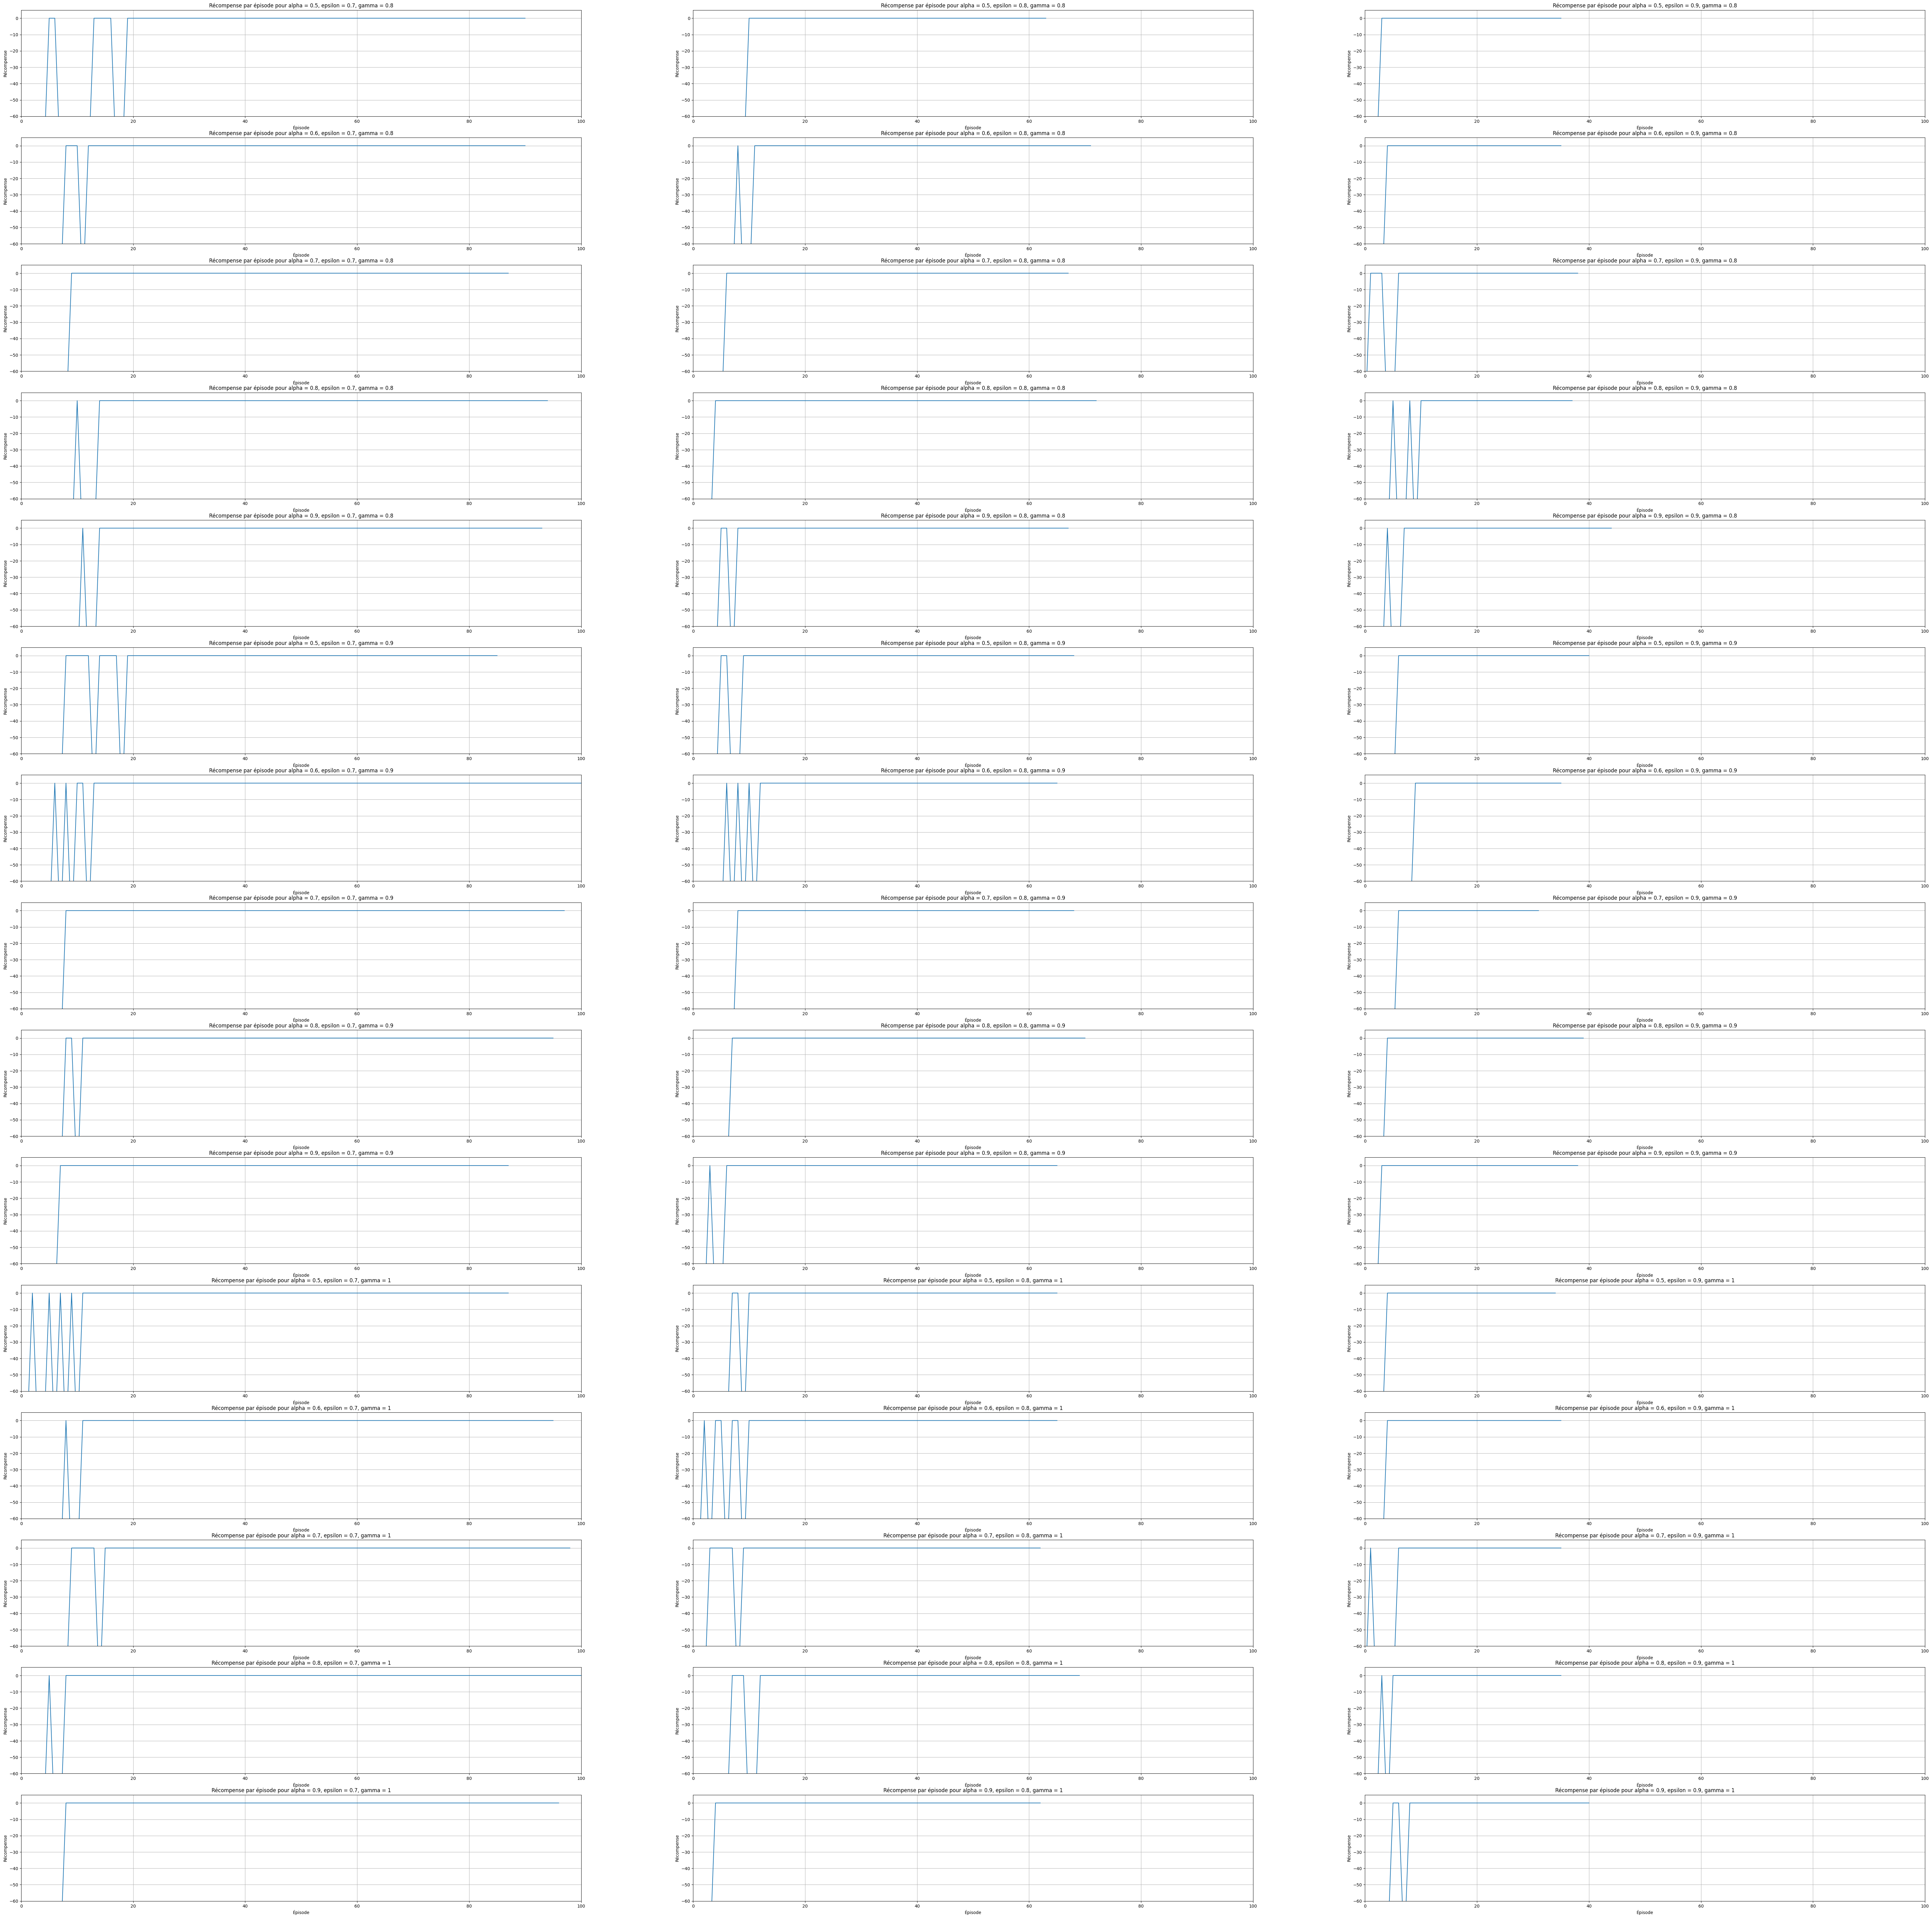

In [14]:

size = 20
timesteps = 6000

# Construct all possibilities
gamma_possibilities = [0.8, 0.9, 1]
eps_possibilities = [0.7, 0.8, 0.9]
lr_possibilities = [0.5, 0.6, 0.7, 0.8, 0.9]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps, plotsize=100)

Nous trouvons de bonnes solutions ici, surtout lorsque alpha vaut 0.7 et gamma 0.8


alpha = 0.7, epsilon = 0.7 et gamma = 0.8 est un exemple de solution satisfaisante.

Nous pourrions pousser d'avantage la recherche en regardant au centième près.

### 1.5 Mesure de performance pour solution retenue QLearning
Pour la solution retenue, voyons comment la vitesse de convergence vers la solution optimale évolue en fonction de la taille du couloir.

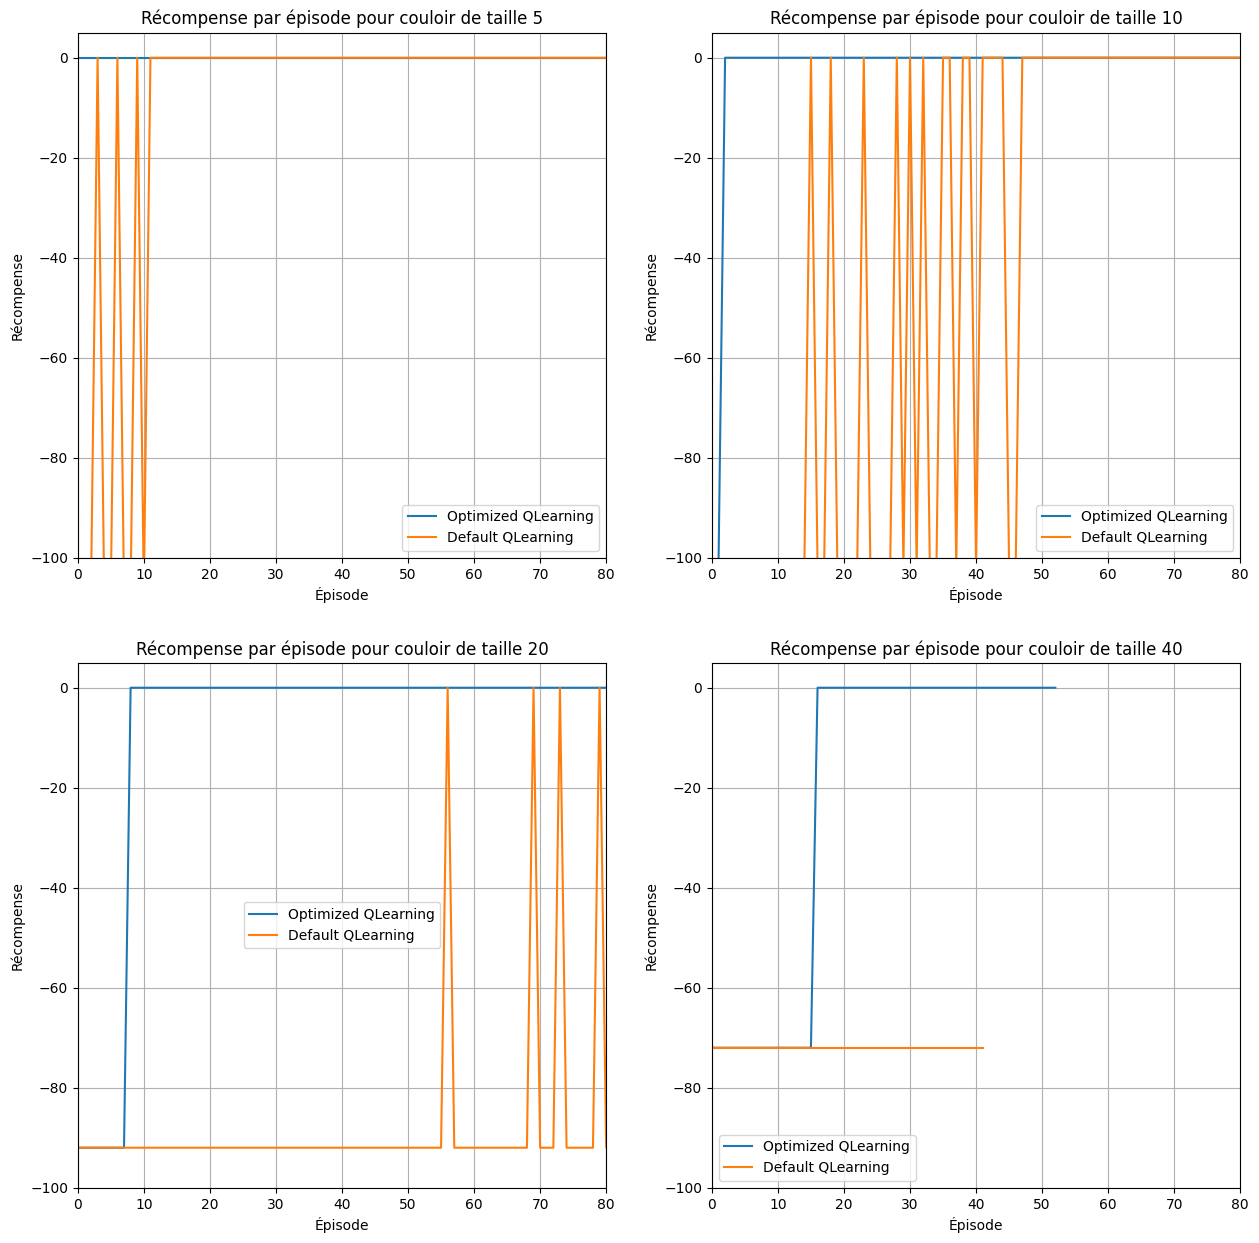

Test Ecrit : 
Trace pour optimise
État actuel : 0
État actuel : 1
État actuel : 2
État actuel : 3
État actuel : 4
État actuel : 5
État actuel : 6
État actuel : 7
État actuel : 8
État actuel : 9
État actuel : 10
État actuel : 11
État actuel : 12
État actuel : 13
État actuel : 14
État actuel : 15
État actuel : 16
État actuel : 17
État actuel : 18
État actuel : 19
État actuel : 20
État actuel : 21
État actuel : 22
État actuel : 23
État actuel : 24
État actuel : 25
État actuel : 26
État actuel : 27
État actuel : 28
État actuel : 29
État actuel : 30
État actuel : 31
État actuel : 32
État actuel : 33
État actuel : 34
État actuel : 35
État actuel : 36
État actuel : 37
État actuel : 38
État actuel : 39
Trace pour defaut
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État actuel : 0
État a

In [34]:
alpha = 0.7
gamma = 0.8
epsilon = 0.7


fig, axes = plt.subplots(2, 2, figsize=(15, 15))
data = [(5, 0, 0), (10, 0, 1), (20, 1, 0), (40, 1, 1)]
timesteps = 8000

for size, x, y in data :
    env = LineWorldEnv(size)
    
    QTable, QRewards = train_q_learning(env, timesteps = timesteps, useProdForReward = True, epsilon = epsilon, alpha = alpha, gamma = gamma)
    
    axes[x ,y].plot([r - (12 - size) for r in QRewards], label = 'Optimized QLearning')

    QTable, QRewards = train_q_learning(env, timesteps = timesteps, useProdForReward = True)
    axes[x, y].plot([r - (12 - size) for r in QRewards], label = 'Default QLearning')

    axes[x, y].legend()
    axes[x ,y].set_xlabel("Épisode")
    axes[x ,y].set_ylabel("Récompense")
    axes[x ,y].set_title(f"Récompense par épisode pour couloir de taille {size}")
    axes[x ,y].grid()
    axes[x ,y].set_xlim([0, 80])
    axes[x ,y].set_ylim([-100, 5])
plt.show()



print("Test Ecrit : ")
env = LineWorldEnv(40)

print("Trace pour optimise")
QTable, QRewards = train_q_learning(env, timesteps = 8000, epsilon = epsilon, alpha = alpha, gamma = gamma)
test_q_learning(env, QTable)

print("Trace pour defaut")
QTable, QRewards = train_q_learning(env, timesteps = 8000)
test_q_learning(env, QTable, maxTimesteps = 20)


print("Nous voyons bien que la version optimisée converge en au plus 8000 timesteps là où la version par défaut ne converge pas au bout de 8000 timesteps")

Une remarque importante !
Le QLearning est une méthode Off-policy, il y a une distinction entre sa policy d'entraînement (epsilon-greedy) et sa policy pour son utilisation post-entraînement (greedy).

Le comportement de l'agent change selon s'il se trouve en entraînement ou non, cela change donc la récompense qu'il peut obtenir.

Ci-dessus la récompense affichée est celle obtenue par l'agent HORS entraînement car c'est bien la récompense de l'agent une fois l'entraînement révolu que l'on souhaite optimiser.

Affichons la récompense obtenue par l'agent pendant l'entraînement pour un couloir de taille 40.

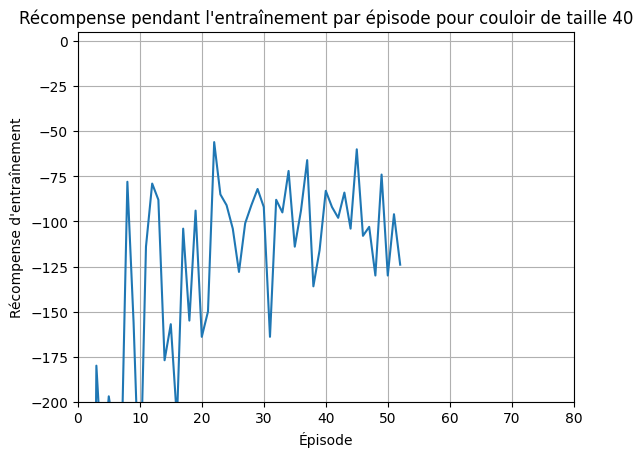

In [33]:
env = LineWorldEnv(40)
QTable, QRewards = train_q_learning(env, timesteps = 8000, epsilon = epsilon, alpha = alpha, gamma = gamma
                                    , useProdForReward = False) # Ce paramètre permet de renvoyer les recompenses d entrainement

plt.plot(QRewards)
plt.xlabel("Épisode")
plt.ylabel("Récompense d'entraînement")
plt.title(f"Récompense pendant l'entraînement par épisode pour couloir de taille {size}")
plt.grid()
plt.xlim([0, 80])
plt.ylim([-200, 5])

plt.show()

On remarque que les récompenses pendant l'entraînement ne sont pas élevées mais ce n'est pas grave, comme QLearning est une méthode off-policy une mauvaise performance pendant l'entraînement n'implique pas nécessaire de mauvaises performances en dehors de l'entraînement sous condition que epsilon soit élevé (ce qui est notre cas).

Cela est conséquence du fait que notre implémentation du QLearning utilise un epsilon constant, ce dernier ne se rapproche donc pas de 0, la récompense pendant l'entraînement a tellement de bruit qu'elle en devient inexploitable.

### 1.6 Conclusion pour QLearning

Il semblerait que lorsque l'on repère une combinaison de paramètres qui ne fonctionne pas correctement pour un couloir de taille restreint alors cette même combinaison fonctionnera encore moins bien relativement aux autres pour un couloir de taille plus conséquente.

Il est donc possible à taille de couloir fixé de déduire pour chaque paramètre un intervalle de valeurs acceptables.
Plus la taille du couloir est élevée, plus l'intervalle est petit.

On augmente petit à petit la taille du couloir pour repérer plus facilement les intervalles intéressants puis on les précise jusqu'à obtenir une combinaison satisfaisante pour la taille de couloir maximale considérée.

Ici, on conserve la solution alpha = 0.7, epsilon = 0.7 et gamma = 0.8


Nous avons aussi observé le fait que pour notre implémentation du QLearning, la récompense pendant entraînement peut avoir tellement de bruit qu'il est préferable d'utiliser la récompense hors entraînement.

### 2. Optimisation de DQN


### 3. Comparaison convergence vers solution optimale LineWorld entre QLearning et DQN

On sait que la récompense obtenue au bout du couloir est de 10
Et que pour tout autre action la récompense maximale est de 1

Ainsi la récompense optimale obtensible pour un couloir de taille n >= 3 est de 12-n


Nous pouvons afficher le point (12-taille_couloir) - recompense afin que l'axe des abscisses représente la récompense maximale obtensible pour l'environnement donné.

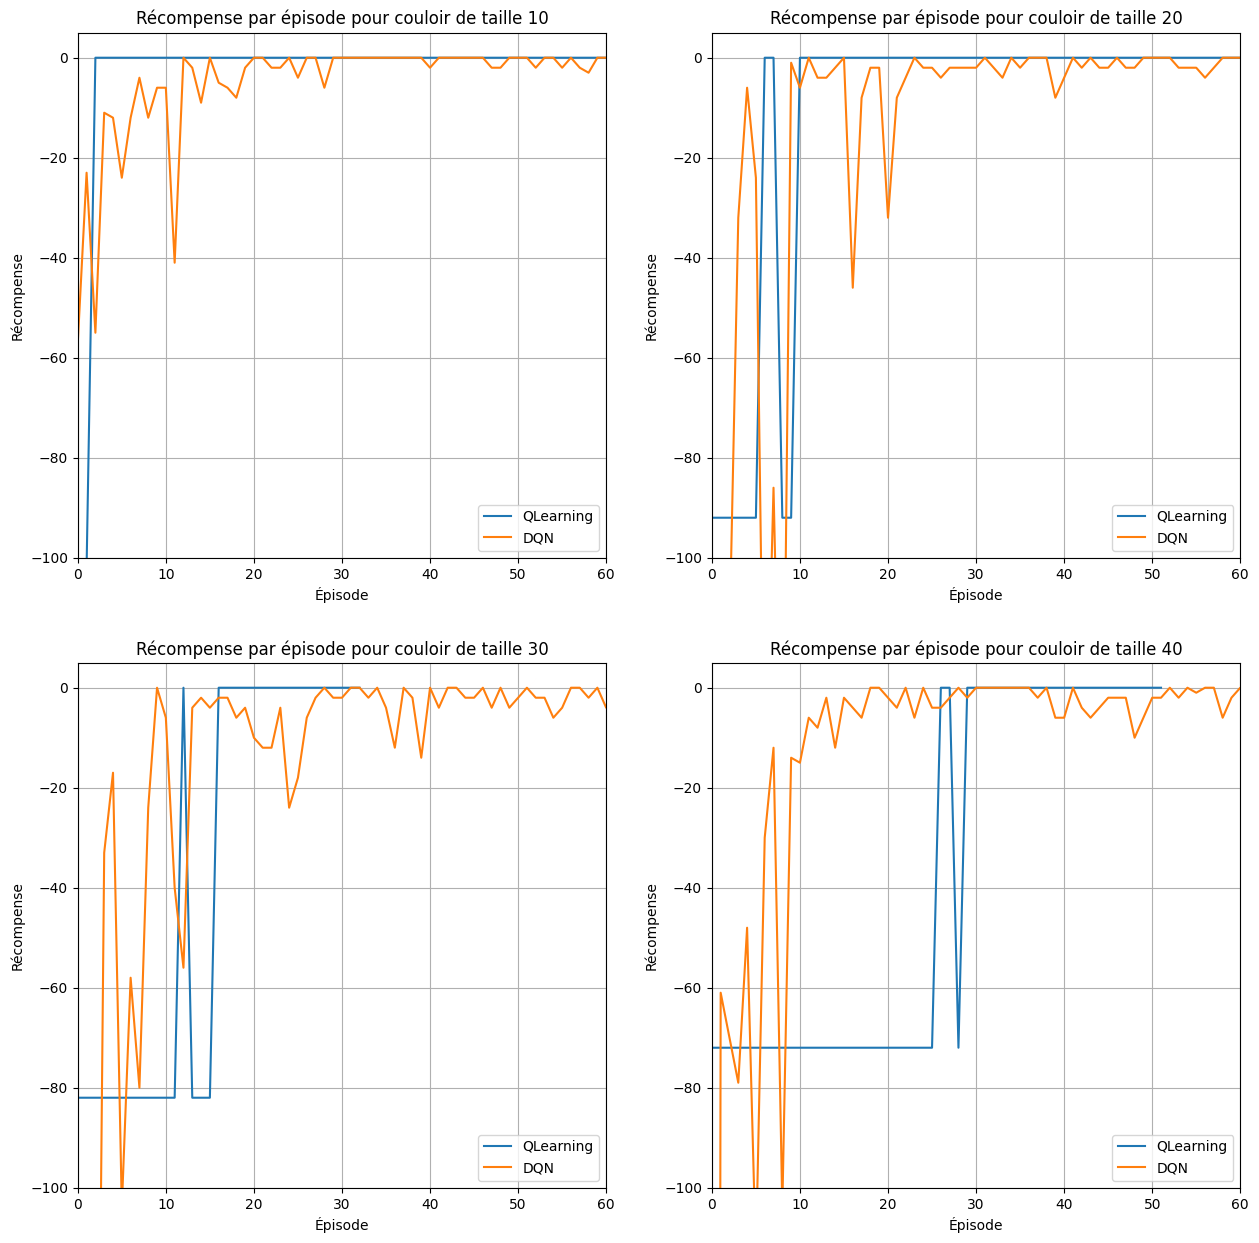

In [9]:

data = [(10, 0, 0, 2000), (20, 0, 1, 4000), (30, 1, 0, 4000), (40, 1, 1, 8000)]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))


for (n_states, x, y, timesteps) in data :
    env = LineWorldEnv(n_states)
    
    DQNmodel, DQNrewards = train_dqn(env, timesteps = timesteps)
    QTable, QRewards = train_q_learning(env, timesteps = timesteps, alpha = 0.7, epsilon = 0.7, gamma = 0.8, useProdForReward = True)
    
    
    axes[x, y].plot([r - (12-n_states) for r in QRewards], label='QLearning')
    axes[x, y].plot([r - (12-n_states) for r in DQNrewards], label='DQN')
    axes[x, y].set_xlim([0, 60])
    axes[x, y].set_ylim([-100, 5])
    axes[x, y].legend()
    axes[x, y].set_xlabel("Épisode")
    axes[x, y].set_ylabel("Récompense")
    axes[x, y].set_title(f"Récompense par épisode pour couloir de taille {n_states}")
    axes[x, y].grid()
plt.show()

Nous remarquons que la méthode tabulaire est plus efficace lorsque que le couloir est de taille limitée.
Néanmoins lorsque la taille du couloir grandit, la méthode (DQN) faisaint usage d'un réseau à la place d'un tableau (QLearning) semble plus adaptée.